# Digital Innovation One - Análise de dados com Python e Pandas (1)

<pre>
Autor: Leonardo Simões
Data: 23/06/2021
</pre>

---
## Sumário
- [Introdução](#intro)
- [Preparação dos dados](#data_wrangling) 
- [Aquisição dos dados](#gather)
- [Avaliação dos dados](#evaluation)
- [Limpeza e organização dos dados](#clean_and_tidiness)
- [Análise Exploratória](#eda)

---
<a id='intro'></a>
## Introdução

Projeto prático "Análise de dados com Python e Pandas" do Bootcamp "Banco Carrefour Data Engineer" da Digital Innovation One.

----
<a id='data_wrangling'></a>
## Preparação dos dados

Esta etapa antecede a análise. Aqui, os dados são carregados, avaliados, organizados e limpos, para garantir que as etapas seguintes sejam feitas de modo correto, conscistente e suscinto. A etapa de preparação de dados é divida em outras que consistem nas tarefas citadas anteriormente.

In [1]:
# imports das bibliotecas usadas até a parte da análise
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Alterar a exibição de float para duas casas decimais
pd.options.display.float_format = '{:20,.2f}'.format

---
<a id='gather'></a>
## Aquisição dos dados

Nesta etapa os dados são carregados em objeto(s) pandas do tipo dataframe. 

In [3]:
df1 = pd.read_excel("./datasets/Aracaju.xlsx")
df1.head(3)

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1


In [4]:
df2 = pd.read_excel("./datasets/Fortaleza.xlsx")
df2.head(3)

,Cidade,Data,Vendas,LojaID,Qtde
0,Fortaleza,2019-01-01,45.27,1002,2
1,Fortaleza,2019-01-01,115.61,1002,3
2,Fortaleza,2019-02-10,35.33,1004,3


In [5]:
df3 = pd.read_excel("./datasets/Natal.xlsx")
df3.head(3)

,Cidade,Data,Vendas,LojaID,Qtde
0,Natal,2018-08-27,606.00,853,2
1,Natal,2018-11-25,563.00,853,2
2,Natal,2019-03-11,308.00,852,3


In [6]:
df4 = pd.read_excel("./datasets/Recife.xlsx")
df4.head(3)

,Cidade,Data,Vendas,LojaID,Qtde
0,Recife,2019-01-01,162.61,981,1
1,Recife,2019-01-01,11.44,983,1
2,Recife,2019-02-10,12.94,983,5


In [7]:
df5 = pd.read_excel("./datasets/Salvador.xlsx")
df5.head(3)

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3


Como os datasets possuem mesmos campos, os dataframes podem ser unidos em apenas um, para facilitar as tarefas seguintes e a análise dos dados.

In [8]:
df = pd.concat([df1,df2,df3,df4,df5])
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
52,Recife,2019-01-01,11.87,981,6
125,Recife,2019-03-02,37.60,983,4
229,Salvador,2019-01-02,43.08,1036,2
78,Recife,2019-01-01,238.73,980,3
80,Recife,2019-01-01,114.14,982,8


---
<a id='evaluation'></a>
## Avaliação dos dados

Nesta etapa, os dataframes são examinados para procurar problemas de organização e qualidade dos dados.

### Informações gerais do dataframe:

In [9]:
def exibir_informacoes_gerais(df):
    # Exibindo informações gerais do dataframe
    valores_na = df.isna().sum()
    informacoes = pd.DataFrame({'Coluna': df.columns,
                                'Tipo': df.dtypes,
                                'Quantidade de ausentes': valores_na,
                                'Porcentagem de ausentes': valores_na / df.shape[0]
                                })
    informacoes.reset_index(drop=True, inplace=True)
    informacoes['Porcentagem de ausentes'] = informacoes['Porcentagem de ausentes'].round(4) * 100
    informacoes['Porcentagem de ausentes'] = informacoes['Porcentagem de ausentes'].astype(str) + ' %'
    #print("Informações gerais das colunas")
    #print(informacoes)
    return informacoes

In [10]:
exibir_informacoes_gerais(df)

,Coluna,Tipo,Quantidade de ausentes,Porcentagem de ausentes
0,Cidade,object,0,0.0 %
1,Data,datetime64[ns],0,0.0 %
2,Vendas,float64,0,0.0 %
3,LojaID,int64,0,0.0 %
4,Qtde,int64,0,0.0 %


### Descrição das colunas quantitativas do dataframe:

In [11]:
def descrever_colunas_quantitativas(df):
    # Descrevendo colunas numéricas (quantitativas)
    descricao_df = df.describe()
    descricao_df.index = ['quantidade', 'média', 'desvio padrao', 'mínimo', 'quartil 1 (25%)',
                          'mediana - quartil 2 (50%)', 'quartil 3 (75%)', 'máximo']
    # print("Descrição de colunas numéricas")
    # print(descricao_df)
    return descricao_df

In [12]:
descrever_colunas_quantitativas(df)

,Vendas,LojaID,Qtde
quantidade,894.00,894.00,894.00
média,122.61,"1,074.84",3.26
desvio padrao,166.82,191.36,2.10
mínimo,3.01,852.00,1.00
quartil 1 (25%),22.38,983.00,2.00
mediana - quartil 2 (50%),44.00,"1,035.00",3.00
quartil 3 (75%),160.93,"1,037.00",4.00
máximo,886.00,"1,523.00",10.00


### Descrição das colunas qualitativas do dataframe:

In [13]:
def descrever_colunas_qualitativas(df):
    # Descrevendo colunas qualitativas
    colunas_qualitativas = df.select_dtypes(exclude=['number']).columns.values
    df_qualitativo = df[colunas_qualitativas]
    if len(df_qualitativo.columns) > 0:
        descricao_qualitativa = pd.DataFrame({'Coluna': df_qualitativo.columns,
                                              'Tipo': df_qualitativo.dtypes,
                                              'Valores únicos': df_qualitativo.nunique(),
                                              'Valor mais comum': df_qualitativo.describe().T['top'],
                                              'Maior frequência': df_qualitativo.describe().T['freq'],
                                              
                                              })
        descricao_qualitativa.reset_index(drop=True, inplace=True)
        #print("Descrição das colunas não numéricas")
        #print(descricao_qualitativa)
        return descricao_qualitativa
    else:
        print("O dataset não possui colunas qualitativas, todas são numéricas.")

In [14]:
descrever_colunas_qualitativas(df)

,Coluna,Tipo,Valores únicos,Valor mais comum,Maior frequência
0,Cidade,object,5,Natal,240
1,Data,datetime64[ns],76,2019-01-01 00:00:00,300


### Avaliação das dimensões dos dataframes:

In [15]:
def printDimensoesDf(df, nome=''):
    print('As dimensões do dataset ' + nome +  ' são ' + str(df.shape[0]) + ' linhas e ' + str(df.shape[1]) + ' colunas.')

In [16]:
#exibir_dimensoes
printDimensoesDf(df, 'atual')

As dimensões do dataset atual são 894 linhas e 5 colunas.


### Avaliação de colunas:

In [17]:
# Colunas originais do dataframe
colunas_df = df.columns.values
colunas_df

array(['Cidade', 'Data', 'Vendas', 'LojaID', 'Qtde'], dtype=object)

### Verificação de linhas duplicadas:

In [18]:
def printNumDuplicadas(df):
    num_duplicadas = df.duplicated().sum()
    print('A quantidade de linhas duplicadas é ' + str(num_duplicadas) + '.')

In [19]:
printNumDuplicadas(df)

A quantidade de linhas duplicadas é 2.


### Verificação de valores ausentes:

In [20]:
df.isna().sum().sum()

0

In [21]:
def printValoresAusentes(df):
    valores_na = df.isna().sum()
    valores_na = valores_na[valores_na > 0].sort_values(ascending=False)

    if not valores_na.empty:
        colunas_na = ', '.join(valores_na.index.values)
        print('As colunas com valores ausentes são: ' + colunas_na + '.')
        print(valores_na)
    else:
        print('Não há colunas com valores ausentes')

In [22]:
printValoresAusentes(df)

Não há colunas com valores ausentes


### Verificação dos tipos de dados das colunas:

In [23]:
df.dtypes.value_counts()

int64             2
float64           1
datetime64[ns]    1
object            1
dtype: int64

---
<a id='clean_and_tidiness'></a>
## Limpeza e organização dos dados

Nesta etapa, os problemas de organização e qualidade dos dados do dataframe serão resolvidos.

### Removendo linhas duplicadas

In [24]:
df.drop_duplicates(keep='last', inplace=True)

In [25]:
# Confirmando que não há linhas duplicadas em df1
assert df.duplicated().sum() == 0

### Alterar tipo da coluna

In [26]:
df["Data"] = pd.to_datetime(df["Data"])

In [27]:
assert str(df["Data"].dtype) == 'datetime64[ns]'

### Criando novas colunas

In [28]:
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [29]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"] 

In [30]:
df["Mes_Venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [31]:
df["Ano_Venda"] = df["Data"].dt.year

In [32]:
df["Diferenca_Dias"] = df["Data"] - df["Data"].min()

In [33]:
df["Trimestre_Venda"] = df["Data"].dt.quarter

In [34]:
novas_colunas = ["Receita","Receita/Vendas","Mes_Venda", "Ano_Venda", "Diferenca_Dias", "Trimestre_Venda"]
novas_colunas = np.array(novas_colunas, dtype=np.object)
novas_colunas

array(['Receita', 'Receita/Vendas', 'Mes_Venda', 'Ano_Venda',
       'Diferenca_Dias', 'Trimestre_Venda'], dtype=object)

In [35]:
assert np.all(np.isin(novas_colunas, df.columns.values))

### Savando dataframe em arquivo .csv

In [36]:
#df.to_csv('cidades.csv', index=False)

---
<a id='eda'></a>
## Análise Exploratória

Colunas que podem ser analisadas:

In [37]:
df.columns

Index(['Cidade', 'Data', 'Vendas', 'LojaID', 'Qtde', 'Receita',
       'Receita/Vendas', 'Mes_Venda', 'dia_venda', 'Ano_Venda',
       'Diferenca_Dias', 'Trimestre_Venda'],
      dtype='object')

    1) Qual a proporções entre as cidades para as amostras nos datasets?

In [38]:
def contar_valores(df, colunas_contagem, porcentagem=False, transposto=False):
    print('Contagem de valores por coluna')
    if colunas_contagem:
        for coluna in colunas_contagem:
            contagem = df[coluna].value_counts(normalize=porcentagem)
            if transposto:
                contagem = contagem.to_frame().T
                contagem.index = ['Quantidade']
            print('Valores de ' + coluna)
            print(contagem)

In [39]:
contar_valores(df, ['Cidade'], porcentagem=False)

Contagem de valores por coluna
Valores de Cidade
Salvador     240
Natal        239
Recife       142
Fortaleza    141
Aracaju      130
Name: Cidade, dtype: int64


In [40]:
contar_valores(df, ['Cidade'], porcentagem=True)

Contagem de valores por coluna
Valores de Cidade
Salvador                    0.27
Natal                       0.27
Recife                      0.16
Fortaleza                   0.16
Aracaju                     0.15
Name: Cidade, dtype: float64


In [41]:
def plotar_barras(df, colunas_barras):
    print('Gráficos de Barras')
  
    if colunas_barras:
        for coluna in colunas_barras:
            color = sns.color_palette("Blues_d")
            fig = plt.figure(figsize=(13, 9))
            ax = sns.countplot(x=df[coluna], palette=color, order=df[coluna].value_counts().index)
            ax.set_title('Distribuição de ' + coluna)
            ax.set_ylabel('Quantidade')
            ax.set_xlabel(coluna.capitalize())

Gráficos de Barras


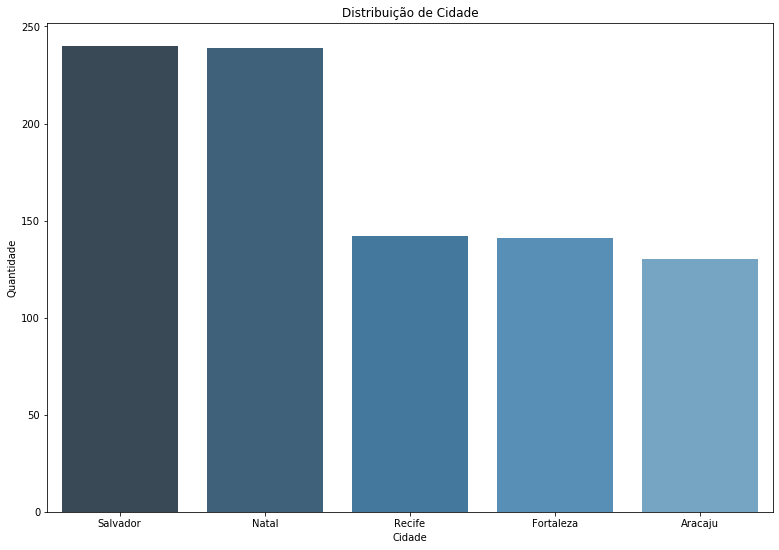

In [42]:
plotar_barras(df, ['Cidade'])

    2) Qual é o período em que há registros das vendas?

In [43]:
df['Data'].min().strftime("%d/%m/%y"), df['Data'].max().strftime("%d/%m/%y")

('01/01/18', '05/04/19')

    3) Qual é o intervalo de dias entre a primeira e a última venda registradas?

In [44]:
(df['Data'].max() - df['Data'].min()).days

459

    4) Qual a maior quantidade de itens em uma venda?

In [45]:
qtde_max = df['Qtde'].max()
qtde_max

10

In [46]:
df.query('Qtde == @qtde_max')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Mes_Venda,dia_venda,Ano_Venda,Diferenca_Dias,Trimestre_Venda
13,Aracaju,2018-01-01,43.45,1522,10,434.50,10.00,1,1,2018,0 days,1
16,Aracaju,2018-01-01,37.68,1522,10,376.80,10.00,1,1,2018,0 days,1
26,Aracaju,2018-01-01,6.98,1521,10,69.80,10.00,1,1,2018,0 days,1
98,Aracaju,2018-01-01,138.33,1521,10,"1,383.30",10.00,1,1,2018,0 days,1
115,Aracaju,2018-01-01,50.99,1522,10,509.90,10.00,1,1,2018,0 days,1
120,Aracaju,2018-01-01,7.73,1520,10,77.30,10.00,1,1,2018,0 days,1


    5) Qual a maior receita por ano, trimestre, mês e dia?

In [54]:
def maxAgrupamento(df, colunas_agrupamento, colunas_descricao):
    return df.groupby(colunas_agrupamento)[colunas_descricao].max()

In [58]:
maxAgrupamento(df, colunas_agrupamento=['Trimestre_Venda'], colunas_descricao=['Receita'])

,Receita
Trimestre_Venda,
1,"3,544.00"
2,"3,340.00"
3,"2,704.00"
4,"3,424.00"


In [59]:
maxAgrupamento(df, colunas_agrupamento=['Mes_Venda'], colunas_descricao=['Receita'])

,Receita
Mes_Venda,
1,"3,436.00"
2,"3,312.00"
3,"3,544.00"
4,"3,112.00"
5,"3,340.00"
6,"2,432.00"
7,"1,288.00"
8,"1,212.00"
9,"2,704.00"


In [60]:
maxAgrupamento(df, colunas_agrupamento=['dia_venda'], colunas_descricao=['Receita'])

,Receita
dia_venda,
1,"1,913.36"
2,"3,424.00"
3,"2,000.00"
5,"1,546.00"
7,"2,604.00"
8,"3,436.00"
9,"2,097.00"
10,"3,172.00"
11,"1,518.00"


    6) Quantas lojas foram analisadas?

In [62]:
df['LojaID'].nunique()

19

    7) Como, em média, foram as vendas gerais por mês no ano de 2018?

In [69]:
vendas_medias_2018 = df.query('Ano_Venda == 2018').groupby('Mes_Venda')['Vendas'].mean()
vendas_medias_2018

Mes_Venda
1                   99.79
2                  576.20
3                  612.50
4                  682.33
5                  501.20
6                  540.75
7                  345.00
8                  606.00
9                  619.33
10                 695.75
11                 563.00
12                 272.00
Name: Vendas, dtype: float64

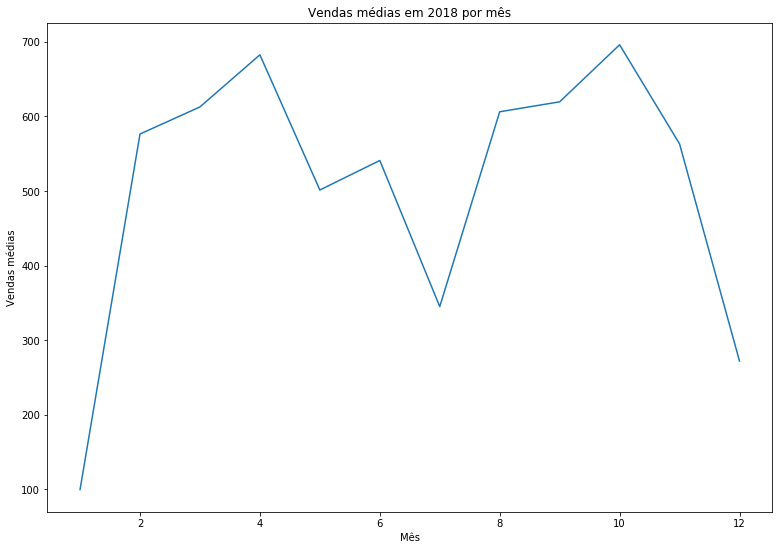

In [78]:
fig = plt.figure(figsize=(13, 9))
ax = sns.lineplot(data=vendas_medias_2018)
ax.set_title('Vendas médias em 2018 por mês')
ax.set_ylabel('Vendas médias')
ax.set_xlabel('Mês');